In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import average_precision_score, roc_auc_score
from malnis import show
import torch
import malnis
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
# plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(style = "whitegrid")

# classical models

In [2]:
data_folder = "/home/jarobyte/scratch/malnis_dataset/data/"

In [3]:
names = os.listdir(data_folder + "classical_models_test")
len(names)

4

In [4]:
predictions = [np.load(data_folder + "classical_models_test/" + m) for m in names]
len(predictions)

4

# data

In [5]:
X_sbert = torch.tensor(np.load(data_folder + "embeddings/sbert/X_test.npy")).cuda()
X_sbert.shape

torch.Size([897, 512, 768])

In [6]:
X_specter = torch.tensor(np.load(data_folder + "embeddings/specter/X_test.npy")).cuda()
X_specter.shape

torch.Size([897, 512, 1536])

In [7]:
train = pd.read_pickle("/home/jarobyte/scratch/malnis_dataset/data/data_train.pkl")

train_targets = np.concatenate(train.relevance.to_list())
print("train", train.shape)
print("train_targets", train_targets.shape)

train (7172, 9)
train_targets (2089747,)


In [8]:
test = pd.read_pickle("/home/jarobyte/scratch/malnis_dataset/data/data_test.pkl")

test_targets = np.concatenate(test.relevance.to_list())
print("test", test.shape)
print("test_targets", test_targets.shape)

test (897, 9)
test_targets (261439,)


# deep models

In [9]:
# lstm_sbert = np.load("/home/jarobyte/scratch/malnis_dataset/lstm/sbert/predictions/13932670_9.npy")
# names.append("lstm_sbert.npy")
# predictions.append(lstm_sbert)

In [10]:
lstm_sbert = malnis.models.LSTM(
#     input_size = 1536,
    hidden_size = 500,
    num_layers = 3
)
lstm_sbert.load_state_dict(torch.load("/home/jarobyte/scratch/malnis_dataset/lstm/sbert/models/13932670_9.pt"))
lstm_sbert.cuda()
lstm_sbert_preds = lstm_sbert.predict(X_sbert)
lstm_sbert_preds = np.concatenate(
    [p[:len(l)] for p, l in zip(lstm_sbert_preds, test.relevance)]
)
# lstm_sbert_preds.shape
names.append("lstm_sbert.npy")
predictions.append(lstm_sbert_preds)
len(names), len(predictions)

LSTM Classfier
Parameters: 17,097,001


(5, 5)

In [11]:
# lstm_specter = np.load("/home/jarobyte/scratch/malnis_dataset/lstm/specter/predictions/13925873_9.npy")
# names.append("lstm_specter.npy")
# predictions.append(lstm_specter)

In [12]:
lstm_specter = malnis.models.LSTM(
    input_size = 1536,
    hidden_size = 500,
    num_layers = 1
)
lstm_specter.load_state_dict(torch.load("/home/jarobyte/scratch/malnis_dataset/lstm/specter/models/13925873_9.pt"))
lstm_specter.cuda()
lstm_specter_preds = lstm_specter.predict(X_specter)
lstm_specter_preds = np.concatenate(
    [p[:len(l)] for p, l in zip(lstm_specter_preds, test.relevance)]
)
names.append("lstm_specter.npy")
predictions.append(lstm_specter_preds)
len(names), len(predictions)

LSTM Classfier
Parameters: 8,153,001


(6, 6)

In [13]:
# transformer_sbert = np.load("/home/jarobyte/scratch/malnis_dataset/transformer/sbert/predictions/13932680_10.npy")
# names.append("transformer_sbert.npy")
# predictions.append(transformer_sbert)

In [14]:
transformer_sbert = malnis.models.Transformer(
    dim_feedforward = 250,
    attention_heads = 4,
    num_layers = 3
)
transformer_sbert.load_state_dict(
    torch.load("/home/jarobyte/scratch/malnis_dataset/transformer/sbert/models/13932680_10.pt")
)
transformer_sbert.cuda()
transformer_sbert_preds = transformer_sbert.predict(X_sbert)
transformer_sbert_preds = np.concatenate(
    [p[:len(l)] for p, l in zip(transformer_sbert_preds, test.relevance)]
)
names.append("transformer_sbert.npy")
predictions.append(transformer_sbert_preds)
len(names), len(predictions)

Transformer Classfier
Parameters: 11,395,817


(7, 7)

In [15]:
# transformer_specter = np.load("/home/jarobyte/scratch/malnis_dataset/transformer/specter/predictions/14158104_4.npy")
# names.append("transformer_specter.npy")
# predictions.append(transformer_specter)

In [16]:
transformer_specter = malnis.models.Transformer(
    dim_feedforward = 350,
    attention_heads = 4,
    num_layers = 3,
    d_model = 1536
)
transformer_specter.load_state_dict(
    torch.load("/home/jarobyte/scratch/malnis_dataset/transformer/specter/models/14158104_4.pt")
)
transformer_specter.cuda()
transformer_specter_preds = transformer_specter.predict(X_specter)
transformer_specter_preds = np.concatenate(
    [p[:len(l)] for p, l in zip(transformer_specter_preds, test.relevance)]
)
names.append("transformer_specter.npy")
predictions.append(transformer_specter_preds)
len(names), len(predictions)

Transformer Classfier
Parameters: 42,894,201


(8, 8)

## mlp words

In [17]:
# mlp_sbert = np.load("/home/jarobyte/scratch/malnis_dataset/mlp_pytorch/sbert/predictions/14628727_2.npy")
# names.append("mlp_sbert.npy")
# predictions.append(mlp_sbert)

In [18]:
mlp_sbert = malnis.models.MLP(
    hidden_size = 300,
#     attention_heads = 4,
    num_layers = 3,
#     d_model = 1536
)
mlp_sbert.load_state_dict(
    torch.load("/home/jarobyte/scratch/malnis_dataset/mlp_pytorch/sbert/models/14628727_2.pt")
)
mlp_sbert.cuda()
mlp_sbert_preds = mlp_sbert.predict(X_sbert)
mlp_sbert_preds = np.concatenate(
    [p[:len(l)] for p, l in zip(mlp_sbert_preds, test.relevance)]
)
names.append("mlp_sbert.npy")
predictions.append(mlp_sbert_preds)
len(names), len(predictions)

MLP Classfier
Parameters: 501,901


(9, 9)

In [19]:
# mlp_specter = np.load("/home/jarobyte/scratch/malnis_dataset/mlp_pytorch/specter/predictions/14678619_2.npy")
# names.append("mlp_specter.npy")
# predictions.append(mlp_specter)

In [20]:
mlp_specter = malnis.models.MLP(
    hidden_size = 450,
#     attention_heads = 4,
    num_layers = 4,
    input_size = 1536
)
mlp_specter.load_state_dict(
    torch.load("/home/jarobyte/scratch/malnis_dataset/mlp_pytorch/specter/models/14678619_2.pt")
)
mlp_specter.cuda()
mlp_specter_preds = mlp_specter.predict(X_specter)
mlp_specter_preds = np.concatenate(
    [p[:len(l)] for p, l in zip(mlp_specter_preds, test.relevance)]
)
names.append("mlp_specter.npy")
predictions.append(mlp_specter_preds)
len(names), len(predictions)

MLP Classfier
Parameters: 1,503,901


(10, 10)

In [21]:
with open("/home/jarobyte/scratch/malnis_dataset/mlp_tfidf/words/models/15010241_7.pkl", "rb") as file:
    mlp_words = pickle.load(file)

In [22]:
corpus = train.sentences.sum()
vectorizer = TfidfVectorizer(
    analyzer = "word",
    ngram_range = (1, 1)
)
print("Vectorizer:", vectorizer)

Vectorizer: TfidfVectorizer()


In [23]:
# print("Examples:", n)
vectorizer.fit(corpus)
# print("train_features:", train_features.shape)

TfidfVectorizer()

In [24]:
# print("Fitting classfier...")
# X = train_features
# Y = train_targets

test_features = [vectorizer.transform(l) for l in test.sentences]
test_preds = [mlp_words.predict_proba(f) for f in test_features]
test_targets = np.concatenate(test.relevance.to_list())
test_preds_flat = np.concatenate(test_preds)[:, 1]

In [25]:
names.append("mlp_words.npy")
predictions.append(test_preds_flat)

In [26]:
len(names), len(predictions)

(11, 11)

## mlp chars

In [27]:
with open("/home/jarobyte/scratch/malnis_dataset/mlp_tfidf/chars/models/14986643_2.pkl", "rb") as file:
    mlp_chars = pickle.load(file)

In [28]:
# corpus = train.sentences.sum()
vectorizer = TfidfVectorizer(
    analyzer = "char",
    ngram_range = (3, 3)
)
print("Vectorizer:", vectorizer)

Vectorizer: TfidfVectorizer(analyzer='char', ngram_range=(3, 3))


In [29]:
# print("Examples:", n)
vectorizer.fit(corpus)
# print("train_features:", train_features.shape)

TfidfVectorizer(analyzer='char', ngram_range=(3, 3))

In [30]:
# print("Fitting classfier...")
# X = train_features
# Y = train_targets

test_features = [vectorizer.transform(l) for l in test.sentences]
test_preds = [mlp_chars.predict_proba(f) for f in test_features]
test_targets = np.concatenate(test.relevance.to_list())
test_preds_flat = np.concatenate(test_preds)[:, 1]

In [31]:
names.append("mlp_chars.npy")
predictions.append(test_preds_flat)

In [32]:
len(names), len(predictions)

(12, 12)

In [33]:
[x.shape for x in predictions]

[(261439,),
 (261439,),
 (261439,),
 (261439,),
 (261439,),
 (261439,),
 (261439,),
 (261439,),
 (261439,),
 (261439,),
 (261439,),
 (261439,)]

In [34]:
[x.min() for x in predictions]

[0.0,
 0.0,
 0.0,
 0.06455716,
 5.39709e-37,
 0.0,
 1.9673948e-07,
 2.9021212e-21,
 0.00027344306,
 7.147733e-06,
 1.6760275991150592e-41,
 1.391110881760358e-19]

In [35]:
[x.max() for x in predictions]

[0.728180912178179,
 0.86291116,
 0.7578950304924801,
 0.9472242,
 1.0,
 1.0,
 0.9999999,
 1.0,
 0.3858643,
 0.3893571,
 0.9420363719769442,
 0.48493222346083753]

In [42]:
df = pd.DataFrame({"name":names, "predictions":predictions})\
.assign(
    name = lambda df: df.name.map(
        lambda x: x[:-4].replace("_", " ")\
        .replace("tfidf", "TFIDF")\
        .replace("lstm", "LSTM")\
        .replace("transformer", "Transformer")\
        .replace("sbert", "SBERT")\
        .replace("specter", "SPECTER")
        .replace("mlp", "MLP")\
        .replace("words", "Words")\
        .replace("chars", "Chars")
    ),
    average_precision = lambda df: df.predictions.map(lambda x: average_precision_score(test_targets, x)),
    roc_auc = lambda df: df.predictions.map(lambda x: roc_auc_score(test_targets, x))
)\
.drop(columns = "predictions")\
.sort_values("roc_auc", ascending = False)\
.set_index("name")\
.rename(columns = dict(average_precision = "Average Precision", roc_auc = "ROC AUC"))\
.drop_duplicates()\
.round(3)

show(df, 20)

(12, 2)


,Average Precision,ROC AUC
name,,
TFIDF Words,0.129,0.775
MLP Chars,0.099,0.734
MLP Words,0.096,0.726
TFIDF Chars,0.092,0.712
LSTM SPECTER,0.179,0.708
LSTM SBERT,0.130,0.699
MLP SPECTER,0.071,0.693
Transformer SPECTER,0.128,0.680
MLP SBERT,0.060,0.660


In [43]:
print(df.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Average Precision &  ROC AUC \\
name                &                    &          \\
\midrule
TFIDF Words         &              0.129 &    0.775 \\
MLP Chars           &              0.099 &    0.734 \\
MLP Words           &              0.096 &    0.726 \\
TFIDF Chars         &              0.092 &    0.712 \\
LSTM SPECTER        &              0.179 &    0.708 \\
LSTM SBERT          &              0.130 &    0.699 \\
MLP SPECTER         &              0.071 &    0.693 \\
Transformer SPECTER &              0.128 &    0.680 \\
MLP SBERT           &              0.060 &    0.660 \\
Transformer SBERT   &              0.130 &    0.646 \\
SBERT               &              0.065 &    0.636 \\
SPECTER             &              0.051 &    0.579 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2476747/2350534188.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


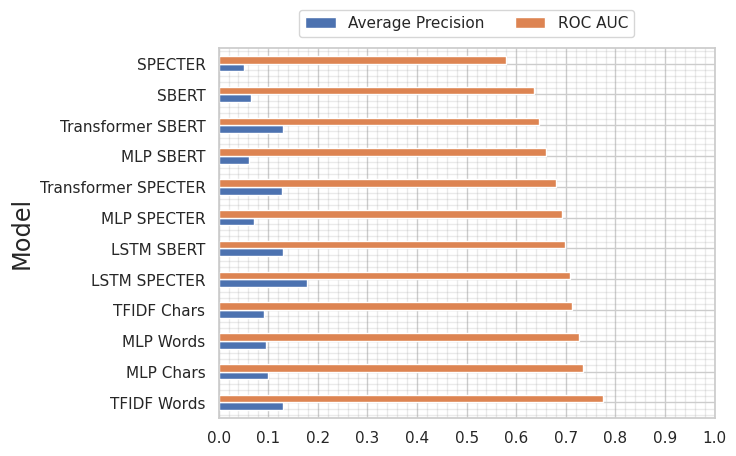

In [41]:
df.plot.barh()
plt.legend(
    bbox_to_anchor=(0.5, 1.125), 
    loc="upper center",
    ncol = 2,
#     title = "Metric"
)
plt.xlim(0, 1)
plt.xticks(np.linspace(0, 1, 11))
plt.ylabel("Model", fontsize = "x-large")
plt.minorticks_on()
# plt.tick_params(axis = "x", which = "minor", length = 20)
plt.grid(visible = True, which = 'minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()